In [3]:
import pandas as pd

df = pd.read_csv('creditcard.csv')

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df['Class'].value_counts(normalize=True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

In [5]:
X = df.drop('Class', axis=1)

y = df['Class']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [7]:
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

model = Pipeline ([

('scaler', StandardScaler()),

('clf', LogisticRegression (random_state=42))

])

model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', LogisticRegression(random_state=42))])

In [8]:
train_accuracy = model.score(X_train, y_train)

print(f'Train accuracy: {train_accuracy:.4f}')

test_accuracy = model.score(X_test, y_test)

print(f'Test accuracy: {test_accuracy:.4f}')

Train accuracy: 0.9992
Test accuracy: 0.9992


In [9]:
from sklearn.metrics import confusion_matrix

y_test_pred = model.predict(X_test)

conf_mat = confusion_matrix(y_test, y_test_pred)

print(conf_mat)

[[71065    14]
 [   46    77]]


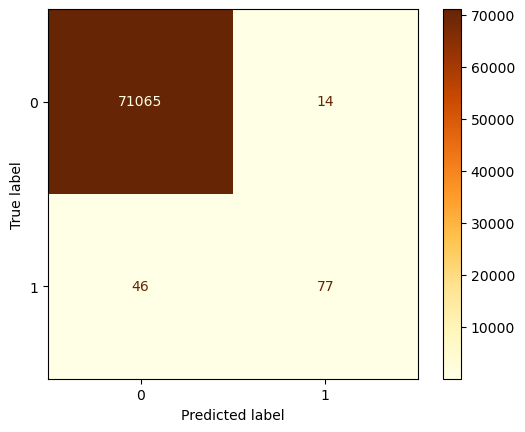

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot(cmap='YlOrBr')

In [12]:
from sklearn.metrics import precision_score, recall_score

precision =precision_score(y_test, y_test_pred)

print(f'Precision: {precision:.4f}')

recall= recall_score(y_test, y_test_pred)

print(f'Recall: {recall:.4f}')

Precision: 0.8462
Recall: 0.6260


In [13]:
from sklearn.metrics import f1_score

f1=f1_score(y_test, y_test_pred)

print(f'F1 score: {f1:.4f}')

F1 score: 0.7196


In [14]:
threshold= 0.3 # Lower the threshold to increase recall

probs= model.predict_proba(X_test)[:, 1] # Probabilities for the positiv

y_test_pred = (probs > threshold).astype (int)

precision = precision_score(y_test, y_test_pred)

print(f'Precision: {precision:.4f}')

recall= recall_score(y_test, y_test_pred)

print(f'Recall: {recall:.4f}')

Precision: 0.7636
Recall: 0.6829


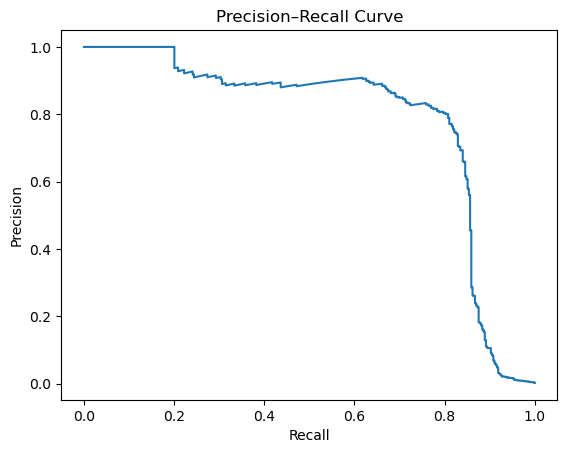

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# 1. Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, stratify=y
)

# 2. Fit your model on the training data
model.fit(X_train, y_train)

# 3. Get predicted probabilities for the positive class
probs = model.predict_proba(X_train)[:, 1]   # IMPORTANT

# 4. Compute precision–recall curve
precisions, recalls, thresholds = precision_recall_curve(y_train, probs)

# 5. Plot
plt.plot(recalls, precisions)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve')
plt.show()


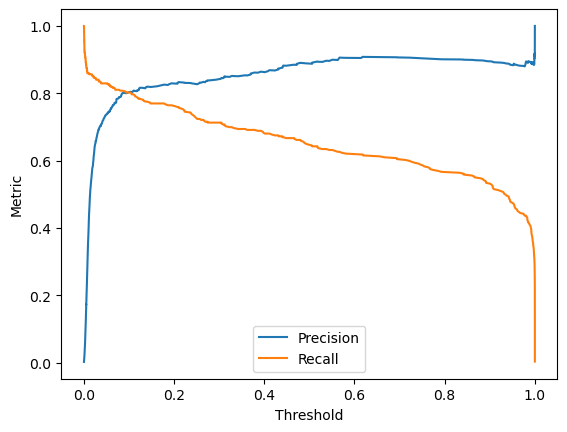

In [16]:
plt.plot(thresholds, precisions [:-1], label='Precision')

plt.plot(thresholds, recalls[:-1], label='Recall')

plt.xlabel('Threshold')

plt.ylabel('Metric')

plt.legend()

plt.show()

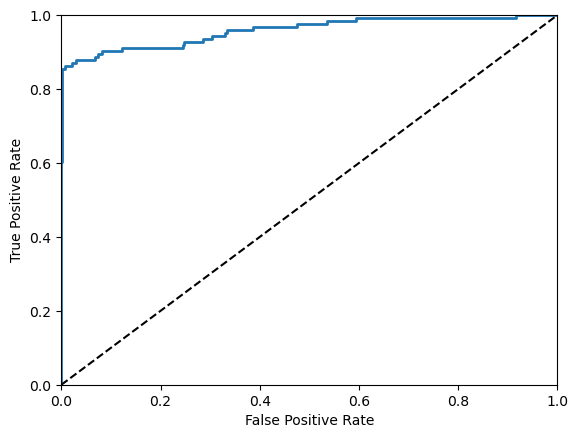

In [17]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Predict probabilities on the TEST set
probs_test = model.predict_proba(X_test)[:, 1]

# Compute ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, probs_test)

# Plot ROC Curve
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')  # diagonal reference line
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()


In [18]:
from sklearn.metrics import roc_auc_score

# Use probabilities from TEST set
probs_test = model.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, probs_test)

print(f'AUC: {auc:.4f}')


AUC: 0.9587
